In [1]:
import networkx as nx
from pykeen.pipeline import pipeline
from pykeen.datasets import Nations, get_dataset
import matplotlib.pyplot as plt
import matplotlib as mpl
import torch
from pykeen.models import predict
import json


In [8]:
from pykeen.hpo import hpo_pipeline
import os

NATIONS_TRAIN_PATH = "397d8cae76d1c0a7_not_mapped.tsv"
NATIONS_TEST_PATH = "944c8368543f21fb_not_mapped.tsv"
NATIONS_VALIDATE_PATH = "f78363e3cc31c563_not_mapped.tsv"

pipeline_result = pipeline(
#     n_trials=3,  # you probably want more than this
    training=NATIONS_TRAIN_PATH,
    testing=NATIONS_TEST_PATH,
    validation=NATIONS_VALIDATE_PATH,
    model='TransE',
    epochs=5,  # short epochs for testing - you should go higher
)
pipeline_result.save_to_directory(os.getcwd()+'/prova_deathstarbench_not_mapped')

INFO:pykeen.pipeline.api:Using device: None


Training epochs on cpu:   0%|          | 0/5 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/1.00 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.05s seconds
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=34, num_relations=20, create_inverse_triples=False, num_triples=33, path="C:\Users\gianl\OneDrive - Politecnico di Milano\Master Thesis\prove\deathstarbench_traces\397d8cae76d1c0a7_not_mapped.tsv") to file:///C:/Users/gianl/OneDrive%20-%20Politecnico%20di%20Milano/Master%20Thesis/prove/deathstarbench_traces/prova_deathstarbench_not_mapped/training_triples
INFO:pykeen.pipeline.api:Saved to directory: file:///C:/Users/gianl/OneDrive%20-%20Politecnico%20di%20Milano/Master%20Thesis/prove/deathstarbench_traces/prova_deathstarbench_not_mapped


In [6]:
# pipeline_result = pipeline(
#     dataset='Nations',
#     model='TransE',
# )
# pipeline_result.save_to_directory('/nations_transe')


<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

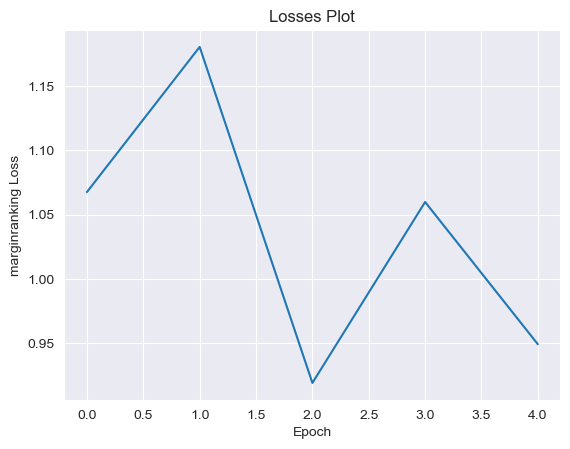

In [7]:
pipeline_result.plot_losses()

In [9]:
# pipeline_result.plot()

In [12]:
model = pipeline_result.model
# Predict tails
predicted_tails_df = predict.get_prediction_df(
    model=model, head_label = "15c04fa3feb96384", relation_label="ComposePost", triples_factory=pipeline_result.training,
)
# # Predict relations
# predicted_relations_df = predict.get_prediction_df(
#     model=model, head_label="brazil", tail_label="uk", triples_factory=pipeline_result.training,
# )
# # Predict heads
# predicted_heads_df = predict.get_prediction_df(
#     model=model, relation_label="conferences", tail_label="brazil", triples_factory=pipeline_result.training
# )
predicted_tails_df

,tail_id,tail_label,score,in_training
0,0,15c04fa3feb96384,-6.256413,False
28,28,ef1d161731725801,-8.215984,False
7,7,6304ae45b9ab3871,-8.802188,False
23,23,a206848afe46ed43,-9.028184,False
9,9,68dc3e9ce6dd9627,-9.099152,False
24,24,a74ab6c184e22059,-9.292605,False
31,31,ff00a49164058a93,-9.364013,False
19,19,8b43aa1bb5d1c09f,-9.520173,False
4,4,397d8cae76d1c0a7,-9.576838,False
1,1,248aaa6c0378cdde,-9.672679,False


In [13]:
# Score all triples (memory intensive)
predictions_df = predict.get_all_prediction_df(model, triples_factory=pipeline_result.training)

scoring:   0%|          | 0.00/680 [00:00<?, ?batch/s]

In [14]:
# Score top K triples (computationally expensive)
top_k_predictions_df = predict.get_all_prediction_df(model, k=150, triples_factory=pipeline_result.training)

scoring:   0%|          | 0.00/680 [00:00<?, ?batch/s]

In [16]:
# # Score a given list of triples
# score_df = predict.predict_triples_df(
#     model=model,
#     triples=[("brazil", "conferences", "uk"), ("brazil", "intergovorgs", "uk")],
#     triples_factory=pipeline_result.training,
# )
# score_df

In [17]:
from pykeen.evaluation import evaluate, ClassificationEvaluator

In [18]:
results = evaluate(model=model,mapped_triples=pipeline_result.training.mapped_triples,evaluator = ClassificationEvaluator(),mode=None,additional_filter_triples=[pipeline_result.training.mapped_triples])

INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/33.0 [00:00<?, ?triple/s]

C:\Users\gianl\anaconda3\envs\MasterThesis\lib\site-packages\rexmex\metrics\classification.py:484: RuntimeWarning: invalid value encountered in power
  pthr = (fpr**0.5) / (fpr**0.5 + tpr**0.5)
C:\Users\gianl\anaconda3\envs\MasterThesis\lib\site-packages\rexmex\metrics\classification.py:547: RuntimeWarning: invalid value encountered in power
  fm = (ppv * tpr) ** 0.5
INFO:pykeen.evaluation.evaluator:Evaluation took 0.05s seconds


In [19]:
results.to_dict()

{'true_negative_rate': 10.8321533203125,
 'true_positive_rate': -9.632367134094238,
 'positive_predictive_value': 0.029275184497237206,
 'negative_predictive_value': 0.9706704020500183,
 'false_negative_rate': 10.632367134094238,
 'false_positive_rate': -9.8321533203125,
 'false_discovery_rate': 0.9707248210906982,
 'false_omission_rate': 0.02932959608733654,
 'positive_likelihood_ratio': 0.9796802997589111,
 'negative_likelihood_ratio': 0.9815561771392822,
 'prevalence_threshold': nan,
 'threat_score': 0.030252786353230476,
 'fowlkes_mallows_index': nan,
 'informedness': 0.19978618621826172,
 'markedness': -5.441904067993164e-05,
 'diagnostic_odds_ratio': 0.9980888962745667,
 'roc_auc_score': 0.5590230664857531,
 'accuracy_score': 0.9420814479638009,
 'balanced_accuracy_score': 0.5002261420171868,
 'f1_score': 0.030303030303030304,
 'average_precision_score': 0.03612311150569488,
 'matthews_correlation_coefficient': 0.0004522840343735866}